# Car Price Prediction

In This project we are going to predict price of cars 

For Price prediction we use 3 Algorithms and Choose the best for calculating the Car Price
1. LinearRegression
2. DecisionTreeRegressor
3. KNeighborsRegressor

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by Score and r2_score metrics

Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Visualization

Step 3:Data training

Step 4: Importing Models

Step 5:Importing Pipeline to Connect the Steps

Step 6:Training our all three models by using pipeline¶

Step 7: Performance Evaluation

# Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('car_price_dataset.csv')

In [3]:
df.sample(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
2918,Kia,Rio,2006,2.0,Electric,Semi-Automatic,49359,4,4,8912
2366,Ford,Focus,2017,3.0,Petrol,Manual,192940,3,5,8341
5342,Audi,A3,2020,3.0,Diesel,Manual,199431,3,4,9111
5811,Audi,A4,2009,1.3,Hybrid,Semi-Automatic,252079,3,3,4058
3617,Hyundai,Tucson,2015,3.4,Electric,Semi-Automatic,7427,2,4,13851


In [4]:
df['Brand'].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [5]:
df['Model'].unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

In [6]:
df['Fuel_Type'].unique()

array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object)

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [8]:
df['Doors'].unique()

array([3, 2, 4, 5], dtype=int64)

In [9]:
df['Owner_Count'].unique()

array([5, 3, 2, 1, 4], dtype=int64)

In [10]:
df['Year'].unique()

array([2020, 2012, 2023, 2003, 2007, 2010, 2001, 2014, 2005, 2013, 2009,
       2004, 2017, 2006, 2000, 2021, 2018, 2016, 2011, 2022, 2008, 2015,
       2002, 2019], dtype=int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [12]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [13]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [14]:
df.shape

(10000, 10)

# Data Visualization

In [15]:
import seaborn as sns

C:\Users\Gungun Tyagi\AppData\Local\Temp\ipykernel_16868\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

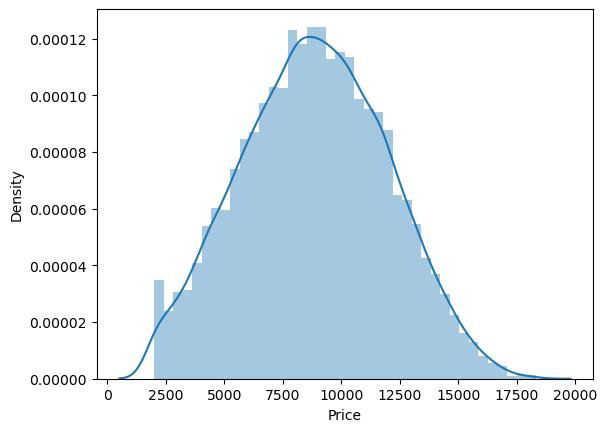

In [16]:
sns.distplot(df['Price'])

From above Distplot we can see than there are so many cars in our data whose price is in range of 10000

<Axes: >

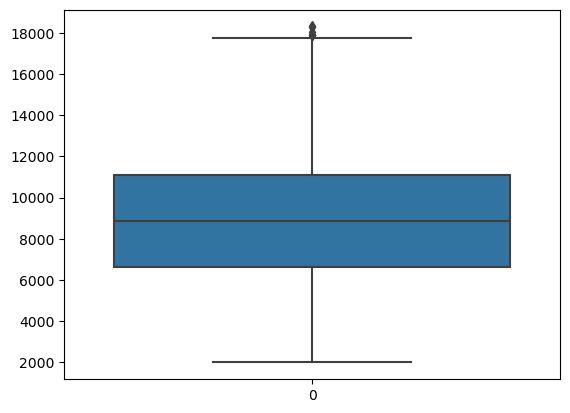

In [17]:
sns.boxplot(df['Price'])

From the above BoxPlot we can see that there are some outliers in our prices so firstly we are going to clean them from our data so that we can Train our model without any error

# Data Training

In [20]:
# Importing Train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [21]:
# Here xtrain and xtest is the data which will have features and ytrain and ytest will have the target i.e. "Price of the car" 
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns='Price',axis=1),df['Price'],test_size=0.2)
# Ratio used  for splitting training and testing data is 8:2 respictively

In [22]:
# Shapes of our Training and testing data
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


Now we Convert our Categorical Data into Numerical Data by using OneHotEncoder

And

We convert our milege from -1 to 1 by using StandardScaler

In [23]:
# Importing OneHotEncoder and StandardScaler from sklearn.preprocessing to Convert our Columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [24]:
# Importing ColumnTransformer from sklearn because it is a powerful tool that allows us to apply different preprocessing and feature extraction pipelines to different subsets of features within our dataset. 
from sklearn.compose import ColumnTransformer

In [25]:
clf1=ColumnTransformer(transformers=[
    ('OneHotEncoder',OneHotEncoder(),[0,1,2,4,5]),
    ('StandardScaler',StandardScaler(),[6])
],remainder='passthrough')

# Importing Models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
lr=LinearRegression()

# Importing Pipeline to Connect the Steps

In [28]:
from sklearn.pipeline import Pipeline

# Training our all three models by using pipeline 

1. LR = LinearRegression
2. DTR = DecisionTreeRegressor
3. KNR = KNeighborsRegressor

In [29]:
LR=Pipeline([
    ('clf1',clf1),
    ('LinearRegression',lr)])

In [30]:
LR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 4, 5]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [6])])),
                ('LinearRegression', LinearRegression())])

In [31]:
dtr=DecisionTreeRegressor()

In [32]:
DTR=Pipeline([
    ('clf1',clf1),
    ('DecisionTreeRegressor',dtr)])

In [33]:
DTR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 4, 5]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [6])])),
                ('DecisionTreeRegressor', DecisionTreeRegressor())])

In [34]:
knr=KNeighborsRegressor()

In [35]:
KNR=Pipeline([
    ('clf1',clf1),
    ('KNeighborsRegressor',knr)])

In [36]:
KNR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [0, 1, 2, 4, 5]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [6])])),
                ('KNeighborsRegressor', KNeighborsRegressor())])

# Performance Evaluation

Importing r2_score from sklearn.metrics because r2_score is used to measure the accuracy of a Regression model and give output from highest 1 and lowest to the infinite negative


In [37]:
from sklearn.metrics import r2_score

In [38]:
score1=LR.score(xtrain,ytrain)

In [39]:
r2score1=r2_score(ytest,LR.predict(xtest))

In [40]:
score2=DTR.score(xtrain,ytrain)

In [41]:
r2score=r2_score(ytest,DTR.predict(xtest))

In [42]:
score3=KNR.score(xtrain,ytrain)

In [43]:
r2score3=r2_score(ytest,KNR.predict(xtest))

In [44]:
print('The score of LinearRegression is ',score1)
print('The score of DecisionTreeRegressor is ',score2)
print('The score of KNeighborsRegressor is ',score3)

The score of LinearRegression is  0.9992588216062371
The score of DecisionTreeRegressor is  1.0
The score of KNeighborsRegressor is  0.7161161828640805


In [45]:
print('The r2_score of LinearRegression is ',r2score1)
print('The r2_score of DecisionTreeRegressor is ',r2score)
print('The r2_score of KNeighborsRegressor is ',r2score3)

The r2_score of LinearRegression is  0.9992481246346616
The r2_score of DecisionTreeRegressor is  0.8891055164134826
The r2_score of KNeighborsRegressor is  0.5772698550639639


Conclusion : As we can see Rank of score from low to high is KNeighborsRegressor(0.71) << LinearRegression (0.99) << DecisionTreeRegressor( 1.0)

And the Rank of r2_score from Low to High is KNeighborsRegressor(0.57) << DecisionTreeRegressor(0.88) << LinearRegression(0.99)

So, As we can see the r2_score and score of KNeighborsRegressor is far behind from both Linear Regression and DecisionTreeRegressor

And DecisionTreeRegressor and Linear Regressor are pretty close to each other 

The Score of LinearRegression is just 0.01 less then the Score of DecisionTreeRegressor

But
The r2_score of LinearRegressor is 0.12 greater then the r2_score of DecisionTreeRegressor

It means both the LinearRegression and DecisonTreeRegressor perform approximately similar on training Data but LinearRegression perform quite good on test data as compare to the DecisionTreeRegressor 

# So, We choose the Model(LinearRegression) to predict our Car price for better Result

In [46]:
import pickle

In [47]:
pickle.dump(LR,open('Car Price Prediction.pkl','wb'))